# Duffing Oscillator Solution- State Space Form

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

In [2]:
# Test that all is working. 
# f_tol adjusts accuracy. This is smaller than reasonable, but illustrative of usage. 
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1]]), .7, f_tol = 1e-12)
print('Equation errors (should be zero): ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[  3.88578059e-16  -1.44328993e-14  -2.10942375e-15]]
Constant term of FFT of signal should be zero:  (-0.107710534581+0j)


In [3]:
# Using more harmonics. 
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, x0 = sp.array([[0,1,-1]]), omega = .7, num_harmonics= 7)
print('Equation errors (should be zero): ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[  2.03840040e-08  -1.14282772e-08  -4.52823956e-09  -1.00924435e-09
   -1.08239696e-08  -2.49637952e-07  -6.82057262e-07  -1.59981777e-07
   -2.75272869e-10   9.92544247e-09   2.19570906e-09   2.51260790e-10
    7.34231167e-08   4.91779858e-07   5.65899313e-07]]
Constant term of FFT of signal should be zero:  (7.04077199642e-06+0j)


Sometimes we can improve just by restarting from the prior end point. Sometimes, we just think it's improved. 

The average for this problem is known to be zero, we got 4.69384799702e-07


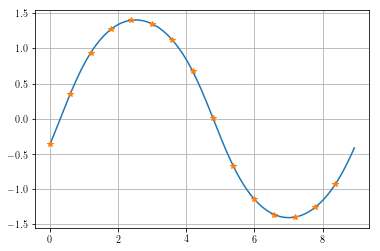

In [4]:
# Let's get a smoother response
time, xc = ms.time_history(t,x)
plt.plot(time,xc.T,t,x.T,'*')
plt.grid(True)
print('The average for this problem is known to be zero, we got', sp.average(x))

In [5]:
def duff_osc_ss(x, params):
    omega = params['omega']
    t = params['cur_time']
    #print('x shape ',x.shape)
    #print(np.array([[1],[-x[0]-.1*x[0]**3-.1*x[1]+1*sin(omega*t)]]))
    return np.array([[x[1]],[-x[0]-.1*x[0]**3-.1*x[1]+1*sin(omega*t)]])

[[-0.00966614  0.5234018   0.85235438  0.92199611  0.73011656  0.29118919
  -0.27313706 -0.71945762 -0.91989617 -0.85870059 -0.53820131]
 [ 0.09574541  0.08002063  0.03915022 -0.01219453 -0.06042603 -0.09126401
  -0.09182321 -0.06181887 -0.01390861  0.03753843  0.07898057]] [[ -5.15837373e-14   3.54161145e-14   2.82412982e-15  -5.44009282e-15
   -9.93649607e-15   4.85306240e-14   2.88657986e-15   1.99840144e-15
    1.16174431e-14   8.09768919e-15  -1.58206781e-15]
 [  8.79247304e-16  -8.90199373e-14  -6.46303826e-11  -2.28276618e-10
   -2.83455551e-12  -3.25030801e-14   1.17582159e-13   3.81027241e-12
    2.38269010e-10   5.51238707e-11  -6.22765728e-14]]
Constant term of FFT of signal should be zero:  (-8.59893299142e-07+0j)


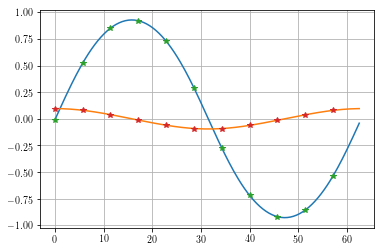

In [6]:
t, x, e, amps, phases = ms.hb_so(duff_osc_ss, sp.array([[0,1,-1],[.1,-.1,0]]), .1, eqform='first_order', num_harmonics=5)

print(x,e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)

plt.plot(time, xc.T, t, x.T, '*')
plt.grid(True)

In [7]:
x

array([[-0.00966614,  0.5234018 ,  0.85235438,  0.92199611,  0.73011656,
         0.29118919, -0.27313706, -0.71945762, -0.91989617, -0.85870059,
        -0.53820131],
       [ 0.09574541,  0.08002063,  0.03915022, -0.01219453, -0.06042603,
        -0.09126401, -0.09182321, -0.06181887, -0.01390861,  0.03753843,
         0.07898057]])

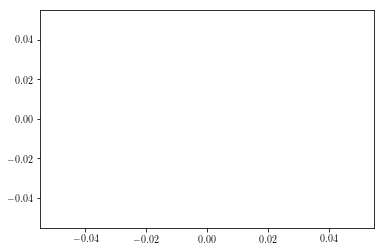

In [8]:
omega = sp.linspace(0.1,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq)#, f_tol = 1e-10)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

The break is an indicative of a break in the branch and is actually a result of the `solution` being unstable.  Not the system, but the solution. By that we mean that while this is considered a solution, it isn't one that will actually continue in a real situation and another solution will necessarily be found. 

A simple solution is to change the starting guess to be away from the solution and see if it finds another one. Indeed that happens. 



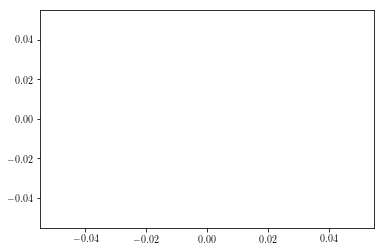

In [9]:
omega = sp.linspace(0.1,3,90)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    #print(sp.average(x))
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, num_harmonics=4, verbose = False, f_tol = 1e-6)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

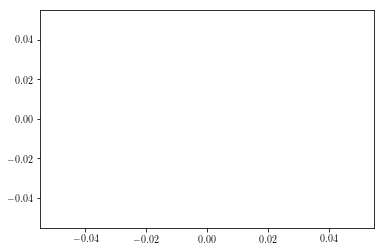

In [10]:
omegal = sp.arange(3,.03,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, num_harmonics=4, f_tol = 1e-6)#, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = sp.nan
plt.plot(omegal, ampl)

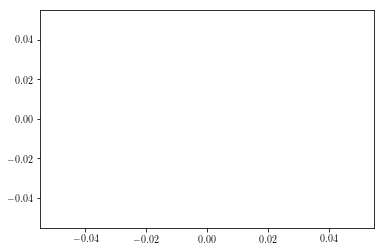

In [11]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [12]:
from scipy.optimize import newton_krylov

In [13]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [14]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [15]:
newton_krylov(duff_amp_resid,-.1)

array(-0.5478691201747141)

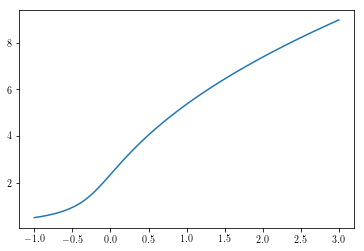

In [16]:
sigmas = sp.linspace(-1,3,200)
amplitudes = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

/Users/jslater/anaconda/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


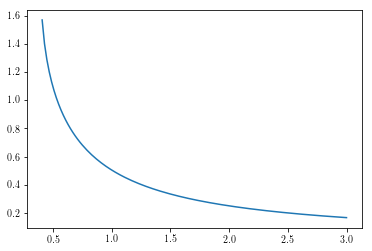

In [17]:
sigmas = sp.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = sp.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

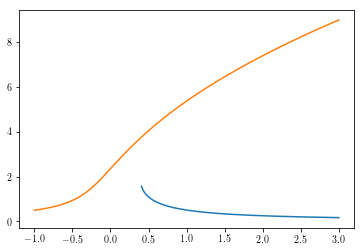

In [18]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)